## GOLD PRICE PREDICTION

## IMPORT LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import ExtraTreesRegressor
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('gld_price_data.csv')

In [4]:
data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


# EDA

In [5]:
data.shape

(2290, 6)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
data.isna().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [8]:
data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [9]:
data.duplicated().sum()

0

In [10]:
data.nunique()

Date       2290
SPX        2277
GLD        1930
USO        1514
SLV        1331
EUR/USD    2066
dtype: int64

### Visualization Analysis

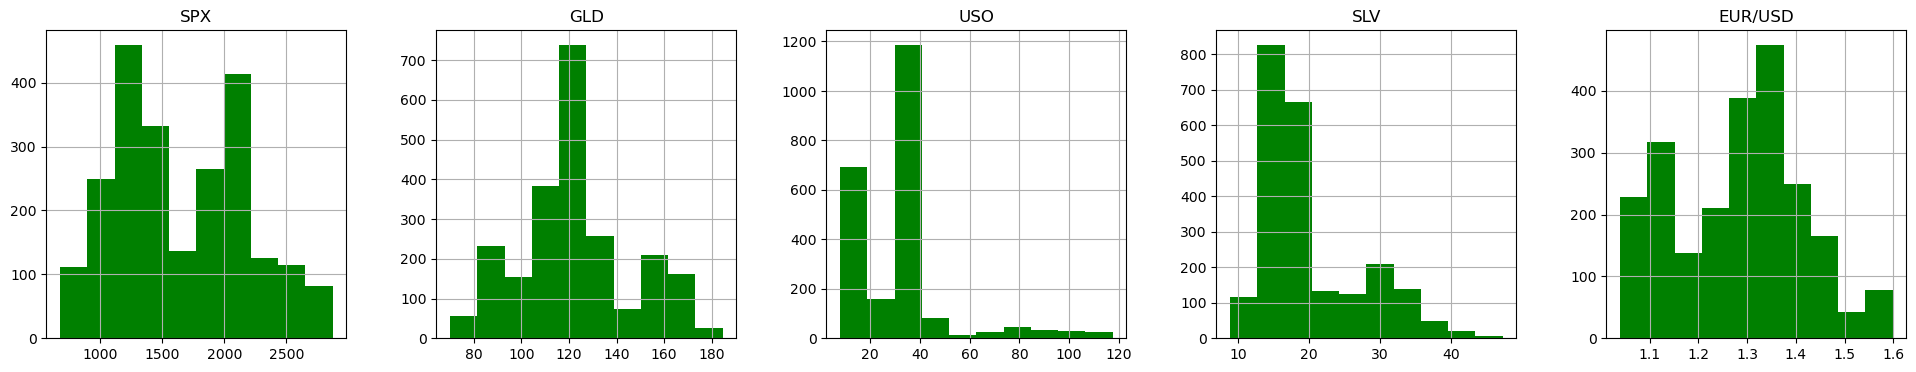

In [11]:
data.hist(figsize=(24,4), layout=(1,5), color="g");

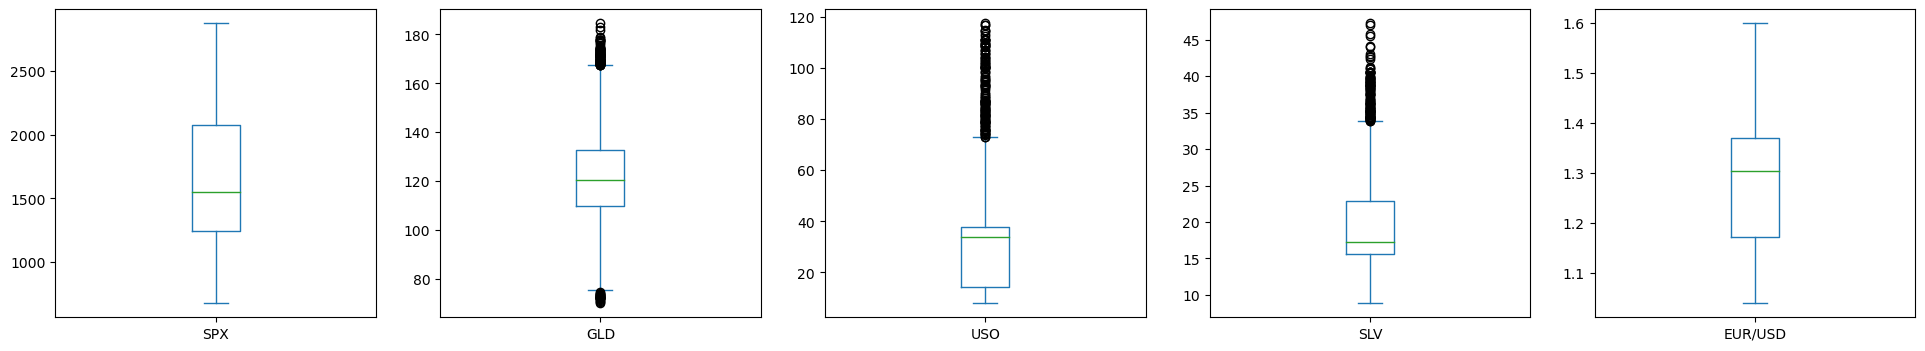

In [12]:
data.plot(kind="box", subplots=True, layout=(1,5), figsize=(24,4),sharex=False, sharey=False);

# PREPROCESSING

In [13]:
data_preprocessed = data.copy()

In [14]:
data_preprocessed.isnull().mean() * 100

Date       0.0
SPX        0.0
GLD        0.0
USO        0.0
SLV        0.0
EUR/USD    0.0
dtype: float64

In [15]:
date_columns = ['Date']
num_columns = data_preprocessed.select_dtypes(include=['float64', 'int64']).columns
target_col = 'GLD'

In [16]:
num_columns

Index(['SPX', 'GLD', 'USO', 'SLV', 'EUR/USD'], dtype='object')

In [17]:
data_preprocessed.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [18]:
data_preprocessed['Date'] = pd.to_datetime(data_preprocessed['Date'])

In [19]:
data_preprocessed.reset_index(drop=True, inplace=True)

In [20]:
data_preprocessed.drop(['Date'], axis=1, inplace=True)

In [21]:
## train test split

X = data.drop(['Date','GLD'],axis=1)
Y = data['GLD']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

In [22]:
X.columns

Index(['SPX', 'USO', 'SLV', 'EUR/USD'], dtype='object')

In [23]:
## Feature Scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# FEATURE SELECTION

In [24]:
from sklearn.feature_selection import SelectKBest

fs = SelectKBest(k=3)
X_train_scaled = fs.fit_transform(X_train_scaled, y_train)
X_test_scaled = fs.transform(X_test_scaled)

# BASELINE MODELING

In [25]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train_scaled, y_train)
y_lr = lr.predict(X_test_scaled)
lr_score = metrics.r2_score(y_test, y_lr)
print(lr_score)

0.896915567366931


In [26]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=3).fit(X_train_scaled, y_train)
y_knn = knn.predict(X_test_scaled)
knn_score = metrics.r2_score(y_test, y_knn)
print(knn_score)

0.9886213810048285


In [28]:
from xgboost import XGBRegressor
xgb = XGBRegressor().fit(X_train_scaled,y_train)
y_xgb = xgb.predict(X_test_scaled)
xgb_score = metrics.r2_score(y_test, y_xgb)
print(xgb_score)

0.9787981819670865


In [29]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor().fit(X_train_scaled,y_train)
y_rf = rf.predict(X_test_scaled)
rf_score = metrics.r2_score(y_test, y_rf)
print(rf_score)

0.9842808870828608


In [30]:
from sklearn.ensemble import ExtraTreesRegressor
et = ExtraTreesRegressor().fit(X_train_scaled,y_train)
y_et = et.predict(X_test_scaled)
et_score = metrics.r2_score(y_test, y_et)
print(et_score)

0.9887261520320044


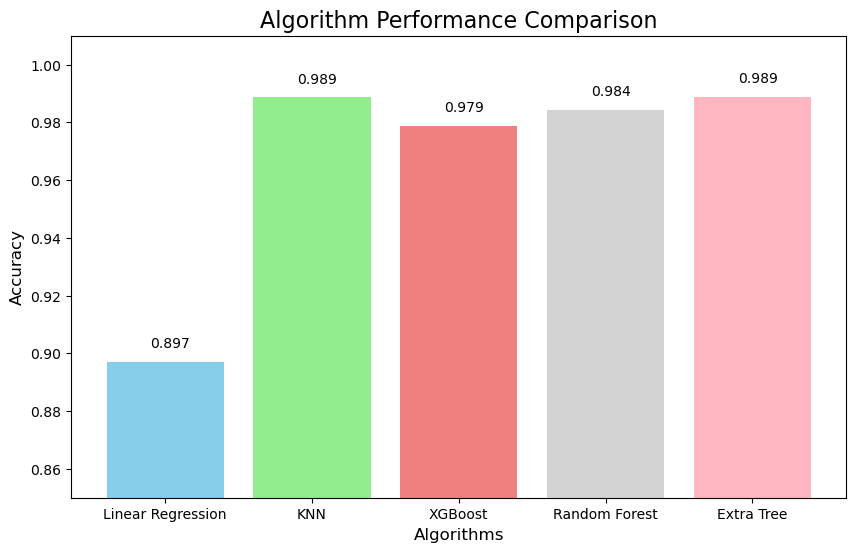

In [37]:
import matplotlib.pyplot as plt
import numpy as np

# Algorithm names and corresponding accuracy values
algorithms = ['Linear Regression', 'KNN', 'XGBoost', 'Random Forest', 'Extra Tree']
accuracies = [0.896915567366931, 0.9886213810048285, 0.9787981819670865, 0.9842808870828608, 0.9887261520320044]

# Create a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(algorithms, accuracies, color=['skyblue', 'lightgreen', 'lightcoral', 'lightgray', 'lightpink'])

# Add value labels above the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, yval + 0.005, round(yval, 3))

# Title and labels
plt.title('Algorithm Performance Comparison', fontsize=16)
plt.xlabel('Algorithms', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.ylim(0.85, 1.01)  # Set y-limit for better visibility of differences

# Display the plot
plt.show()


## MODEL EVALUATION

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import joblib

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', ExtraTreesRegressor())
])

pipeline.fit(X_train, y_train)

joblib.dump(pipeline, 'pipeline_model.pkl')

['pipeline_model.pkl']

In [41]:
new_data = pd.DataFrame({
    'SPX': [1447.160034],
    'USO': [78.470001],
    'SLV': [15.180],
    'EUR/USD': [1.471692]
})

In [42]:
prediction = pipeline.predict(new_data)

print("Prediction for new data:", prediction[0])

Prediction for new data: 84.86000099999997
